# Mini Project 2
<div dir=rtl>

## محمدمهدی معاضدی

## 99304**73**
از انجا که شماره دانشجویی اینجانب 9930473 می باشد برای Random State را برابر با دو رقم آخر شمارۀ دانشجویی خود در یعنی 73 درنظر میگیریم.
</div>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim, tensor

In [17]:
# First Section:
dataSet = pd.read_csv("teleCust1000t.csv")
df = dataSet
# df.describe()
# df.custcat.value_counts().sort_index().plot(kind="bar")
# df.count()

In [18]:
# # Second Section:
# dataCorr = df.corr()
# plt.figure(figsize=(15, 10))
# sns.heatmap(dataCorr, vmin=-1, vmax=1, center=0, annot=True)
# print(dataCorr)

In [19]:
# Third Section:
torch.manual_seed(63)
target = df["custcat"]
target = pd.DataFrame(target)
features = df.drop(["custcat"], axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_target = scaler.fit_transform(target)
scaled_target_df = pd.DataFrame(scaled_target, columns=target.columns)
trainFeatures, testFeatures, trainTargets, testTargets = train_test_split(
    scaled_features_df, scaled_target_df, test_size=0.2, random_state=63
)
testFeatures, validFeatures, testTargets, validTargets = train_test_split(
    testFeatures, testTargets, test_size=0.5, random_state=63
)
train_features = tensor(trainFeatures.to_numpy(), dtype=torch.float32)
valid_features = tensor(validFeatures.to_numpy(), dtype=torch.float32)
test_features = tensor(testFeatures.to_numpy(), dtype=torch.float32)
train_targets = tensor(trainTargets.to_numpy(), dtype=torch.float32).reshape(-1, 1)
valid_targets = tensor(validTargets.to_numpy(), dtype=torch.float32).reshape(-1, 1)
test_targets = tensor(testTargets.to_numpy(), dtype=torch.float32).reshape(-1, 1)

In [57]:
def train_model(model, X_train, y_train, X_val, y_val,learn_rate=0.1,epochs=300,b_size=200):
    torch.manual_seed(63)
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)
    n_epochs = epochs
    batch_size = b_size
    ls_train_list = []
    ls_val_list = []
    ls_train_list2 = []
    ls_val_list2 = []

    for epoch in range(n_epochs):
        for b in range(0, X_train.shape[0], batch_size):
            model.train()

            # Get data
            X_train_batch = X_train[b:b+batch_size]
            y_train_batch = y_train[b:b+batch_size]

            y_train_batch_pred = model(X_train_batch)

            # Calculate loss
            loss_train = criterion(y_train_batch_pred, y_train_batch)

            # Backpropagation
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

        # Evaluation on val data
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            loss_val = criterion(y_val_pred, y_val)
            loss_train_precent=loss_train.item()*100
            loss_val_precent=loss_val.item()*100
            ls_train_list.append(loss_train.item())
            ls_val_list.append(loss_val.item())
            ls_train_list2.append(loss_train_precent)
            ls_val_list2.append(loss_val_precent)
            print(
                f"Epoch {epoch+1}, training loss {loss_train_precent}, validation loss {loss_val_precent}"
            )
    plt.figure()
    plt.plot(range(len(ls_train_list2)), ls_train_list2,label='training loss')
    plt.plot(range(len(ls_val_list2)), ls_val_list2,label='validation loss')
    plt.legend(loc='upper right')
    plt.show()
    optimizer.zero_grad()
    return model

# def validation_auc(model, X_val, y_val):
#     model.eval()
#     with torch.no_grad():
#         y_val_pred = model(X_val)

#     fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
#     roc_auc = auc(fpr, tpr)
#     return roc_auc

def weight_reset(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

Epoch 1, training loss 72.30635285377502, validation loss 70.64307928085327
Epoch 2, training loss 71.75138592720032, validation loss 70.28122544288635
Epoch 3, training loss 71.30694389343262, validation loss 70.00172138214111
Epoch 4, training loss 70.95347046852112, validation loss 69.78748440742493
Epoch 5, training loss 70.67020535469055, validation loss 69.62996125221252
Epoch 6, training loss 70.44243812561035, validation loss 69.51104998588562
Epoch 7, training loss 70.25707960128784, validation loss 69.41986083984375
Epoch 8, training loss 70.10661959648132, validation loss 69.35223340988159
Epoch 9, training loss 69.98308300971985, validation loss 69.30264830589294
Epoch 10, training loss 69.87952589988708, validation loss 69.26727294921875
Epoch 11, training loss 69.79347467422485, validation loss 69.24248337745667
Epoch 12, training loss 69.72130537033081, validation loss 69.2278802394867
Epoch 13, training loss 69.66046094894409, validation loss 69.21980381011963
Epoch 14,

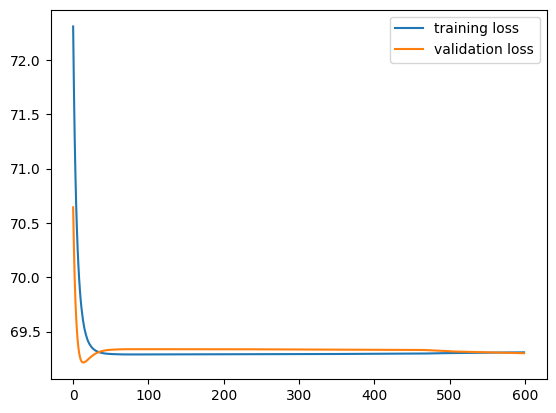

In [58]:
OneLayerModel = nn.Sequential(
    nn.Linear(11, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid(),
)
Model=train_model(OneLayerModel,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 71.7795729637146, validation loss 70.31965851783752
Epoch 2, training loss 71.1564302444458, validation loss 69.94731426239014
Epoch 3, training loss 70.67933082580566, validation loss 69.68399286270142
Epoch 4, training loss 70.31405568122864, validation loss 69.50092315673828
Epoch 5, training loss 70.03427147865295, validation loss 69.37642097473145
Epoch 6, training loss 69.81973052024841, validation loss 69.29413080215454
Epoch 7, training loss 69.65503096580505, validation loss 69.24192905426025
Epoch 8, training loss 69.52829957008362, validation loss 69.21077966690063
Epoch 9, training loss 69.4304883480072, validation loss 69.19401288032532
Epoch 10, training loss 69.35467720031738, validation loss 69.18681859970093
Epoch 11, training loss 69.29559111595154, validation loss 69.18572783470154
Epoch 12, training loss 69.24923658370972, validation loss 69.18830871582031
Epoch 13, training loss 69.21257972717285, validation loss 69.19286847114563
Epoch 14, t

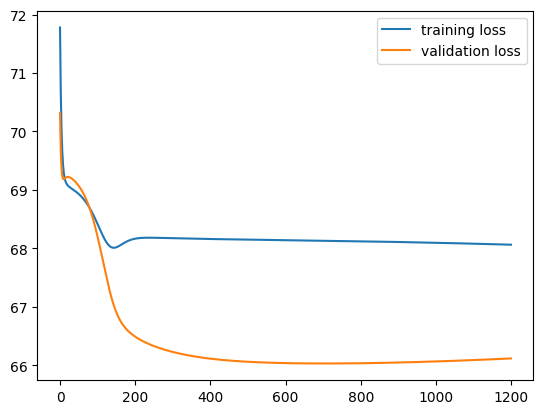

In [64]:
TwoLayerModel = nn.Sequential(
    nn.Linear(11, 7),
    nn.ELU(),
    nn.Linear(7, 5),
    nn.ELU(),
    nn.Linear(5, 3),
    nn.ELU(),
    nn.Linear(3, 1),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel,train_features,train_targets,valid_features,valid_targets,epochs=1200,b_size=200)

Epoch 1, training loss 69.63275074958801, validation loss 69.25958395004272
Epoch 2, training loss 69.55268383026123, validation loss 69.26257610321045
Epoch 3, training loss 69.49644684791565, validation loss 69.27207112312317
Epoch 4, training loss 69.45644617080688, validation loss 69.28421258926392
Epoch 5, training loss 69.42759156227112, validation loss 69.29676532745361
Epoch 6, training loss 69.4064736366272, validation loss 69.30857300758362
Epoch 7, training loss 69.39077973365784, validation loss 69.31906342506409
Epoch 8, training loss 69.37893629074097, validation loss 69.3280279636383
Epoch 9, training loss 69.36984062194824, validation loss 69.33549642562866
Epoch 10, training loss 69.36277151107788, validation loss 69.34154033660889
Epoch 11, training loss 69.35716271400452, validation loss 69.34632658958435
Epoch 12, training loss 69.35265064239502, validation loss 69.35003399848938
Epoch 13, training loss 69.34896111488342, validation loss 69.35280561447144
Epoch 14, 

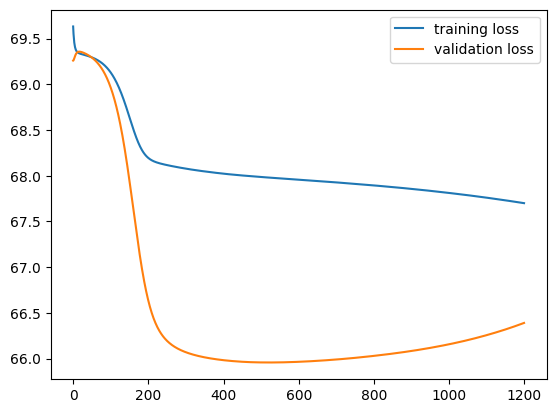

In [65]:
TwoLayerModel = nn.Sequential(
    nn.Linear(11, 15),
    nn.ELU(),
    nn.Linear(15, 10),
    nn.ELU(),
    nn.Linear(10, 15),
    nn.ELU(),
    nn.Linear(15, 1),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel,train_features,train_targets,valid_features,valid_targets,epochs=1200,b_size=200)

Epoch 1, training loss 0.7230635285377502, validation loss 0.7064307928085327
Epoch 2, training loss 0.7175138592720032, validation loss 0.7028122544288635
Epoch 3, training loss 0.7130694389343262, validation loss 0.7000172138214111
Epoch 4, training loss 0.7095347046852112, validation loss 0.6978748440742493
Epoch 5, training loss 0.7067020535469055, validation loss 0.6962996125221252
Epoch 6, training loss 0.7044243812561035, validation loss 0.6951104998588562
Epoch 7, training loss 0.7025707960128784, validation loss 0.6941986083984375
Epoch 8, training loss 0.7010661959648132, validation loss 0.6935223340988159
Epoch 9, training loss 0.6998308300971985, validation loss 0.6930264830589294
Epoch 10, training loss 0.6987952589988708, validation loss 0.6926727294921875
Epoch 11, training loss 0.6979347467422485, validation loss 0.6924248337745667
Epoch 12, training loss 0.6972130537033081, validation loss 0.6922788023948669
Epoch 13, training loss 0.6966046094894409, validation loss 0

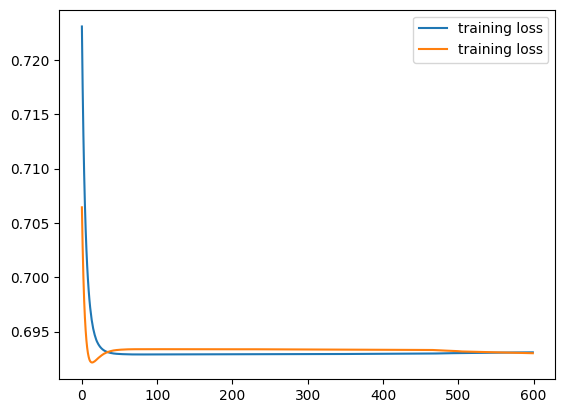

In [23]:
OneLayerModel = nn.Sequential(
    nn.Linear(11, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid(),
)
Model=train_model(OneLayerModel,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.7341123223304749, validation loss 0.7053631544113159
Epoch 2, training loss 0.723299503326416, validation loss 0.7010883092880249
Epoch 3, training loss 0.7162023782730103, validation loss 0.6980245113372803
Epoch 4, training loss 0.7105005383491516, validation loss 0.6956260204315186
Epoch 5, training loss 0.705966591835022, validation loss 0.6936064958572388
Epoch 6, training loss 0.7023036479949951, validation loss 0.6918490529060364
Epoch 7, training loss 0.6992606520652771, validation loss 0.6904038786888123
Epoch 8, training loss 0.6966520547866821, validation loss 0.6891131401062012
Epoch 9, training loss 0.6945251226425171, validation loss 0.6879740357398987
Epoch 10, training loss 0.692717969417572, validation loss 0.6868805885314941
Epoch 11, training loss 0.6912079453468323, validation loss 0.6862335801124573
Epoch 12, training loss 0.6899391412734985, validation loss 0.6857288479804993
Epoch 13, training loss 0.6889719367027283, validation loss 0.68

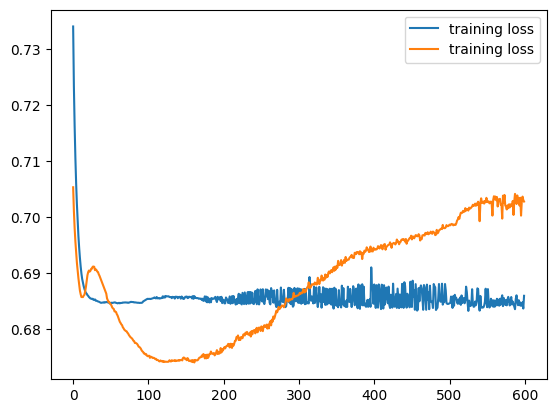

In [24]:
OneLayerModel_Batchnorm = nn.Sequential(
    nn.Linear(11, 5),
    nn.ReLU(),
    nn.BatchNorm1d(5),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.BatchNorm1d(3),
    nn.Linear(3, 1),
    nn.Sigmoid(),
)
Model=train_model(OneLayerModel_Batchnorm,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.7160590291023254, validation loss 0.7064865231513977
Epoch 2, training loss 0.7081701755523682, validation loss 0.7029659152030945
Epoch 3, training loss 0.7030152678489685, validation loss 0.7005023956298828
Epoch 4, training loss 0.6990582942962646, validation loss 0.698825478553772
Epoch 5, training loss 0.6953204274177551, validation loss 0.6975209712982178
Epoch 6, training loss 0.692207932472229, validation loss 0.6965379118919373
Epoch 7, training loss 0.6903460621833801, validation loss 0.6954392194747925
Epoch 8, training loss 0.6881058216094971, validation loss 0.6931421756744385
Epoch 9, training loss 0.6858615875244141, validation loss 0.6919188499450684
Epoch 10, training loss 0.6838852167129517, validation loss 0.690418004989624
Epoch 11, training loss 0.6821081042289734, validation loss 0.6897274255752563
Epoch 12, training loss 0.6804714202880859, validation loss 0.6893461346626282
Epoch 13, training loss 0.6789841651916504, validation loss 0.68

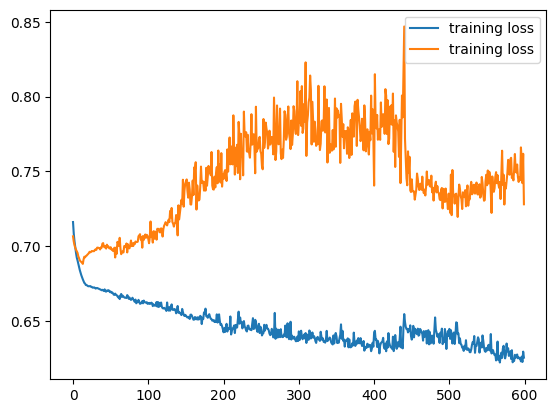

In [25]:
TwoLayerModel_Batchnorm = nn.Sequential(
    nn.Linear(11, 7),
    nn.ReLU(),
    nn.BatchNorm1d(7),
    nn.Linear(7, 5),
    nn.ReLU(),
    nn.BatchNorm1d(5),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.BatchNorm1d(3),
    nn.Linear(3, 1),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel_Batchnorm,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.7018601298332214, validation loss 0.7163251638412476
Epoch 2, training loss 0.6995860934257507, validation loss 0.7129309177398682
Epoch 3, training loss 0.6979517936706543, validation loss 0.7100173830986023
Epoch 4, training loss 0.6966575384140015, validation loss 0.7075186371803284
Epoch 5, training loss 0.6955487728118896, validation loss 0.7053224444389343
Epoch 6, training loss 0.6946239471435547, validation loss 0.7033905982971191
Epoch 7, training loss 0.6939642429351807, validation loss 0.7016777992248535
Epoch 8, training loss 0.6934345364570618, validation loss 0.7001501321792603
Epoch 9, training loss 0.6930370330810547, validation loss 0.6988419890403748
Epoch 10, training loss 0.6926536560058594, validation loss 0.6976574659347534
Epoch 11, training loss 0.6923204064369202, validation loss 0.6963258981704712
Epoch 12, training loss 0.6920871734619141, validation loss 0.6950320601463318
Epoch 13, training loss 0.6919967532157898, validation loss 0

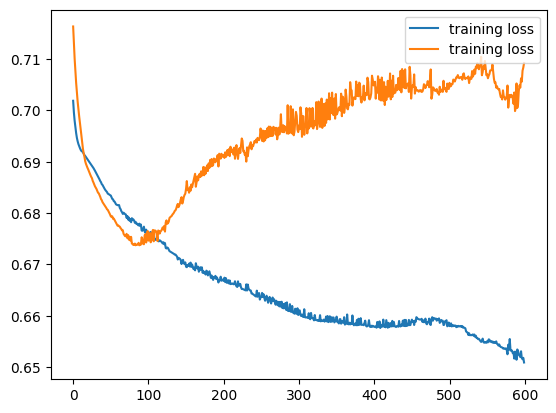

In [26]:
TwoLayerModel_Batchnorm = nn.Sequential(
    nn.Linear(11, 7),
    nn.ReLU(),
    nn.BatchNorm1d(7),
    nn.Linear(7, 7),
    nn.ReLU(),
    nn.Linear(7, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel_Batchnorm,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.7619125843048096, validation loss 0.7028043866157532
Epoch 2, training loss 0.7187168598175049, validation loss 0.6971868276596069
Epoch 3, training loss 0.7257440090179443, validation loss 0.6931160092353821
Epoch 4, training loss 0.7109304666519165, validation loss 0.6899135112762451
Epoch 5, training loss 0.7078865170478821, validation loss 0.6875128746032715
Epoch 6, training loss 0.7004590630531311, validation loss 0.6862578392028809
Epoch 7, training loss 0.688383162021637, validation loss 0.6845466494560242
Epoch 8, training loss 0.703644871711731, validation loss 0.6828043460845947
Epoch 9, training loss 0.6912732124328613, validation loss 0.6816090941429138
Epoch 10, training loss 0.6942362785339355, validation loss 0.6809897422790527
Epoch 11, training loss 0.6928972601890564, validation loss 0.6804182529449463
Epoch 12, training loss 0.7000158429145813, validation loss 0.6800472736358643
Epoch 13, training loss 0.694663405418396, validation loss 0.68

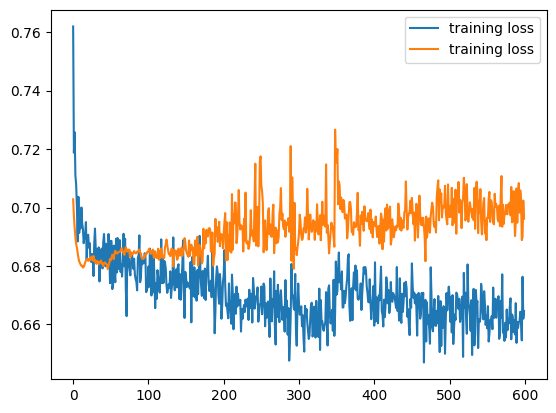

In [27]:
OneLayerModel_Batchnorm_dropout = nn.Sequential(
    nn.Linear(11, 6),
    nn.ReLU(),
    nn.BatchNorm1d(6),
    nn.Linear(6, 6),
    nn.ReLU(),
    nn.BatchNorm1d(6),
    nn.Linear(6, 1),
    nn.Dropout(p=0.2),
    nn.Sigmoid(),
)
Model=train_model(OneLayerModel_Batchnorm_dropout,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.7453452944755554, validation loss 0.7460517883300781
Epoch 2, training loss 0.7368355393409729, validation loss 0.7222543954849243
Epoch 3, training loss 0.7028602361679077, validation loss 0.7079723477363586
Epoch 4, training loss 0.7210264801979065, validation loss 0.7006811499595642
Epoch 5, training loss 0.705443263053894, validation loss 0.6967828273773193
Epoch 6, training loss 0.6884132623672485, validation loss 0.6948806643486023
Epoch 7, training loss 0.6968287825584412, validation loss 0.6947869658470154
Epoch 8, training loss 0.6854629516601562, validation loss 0.695451021194458
Epoch 9, training loss 0.6787744164466858, validation loss 0.6962020993232727
Epoch 10, training loss 0.695777952671051, validation loss 0.696891725063324
Epoch 11, training loss 0.687624454498291, validation loss 0.6981590986251831
Epoch 12, training loss 0.686794638633728, validation loss 0.7011759877204895
Epoch 13, training loss 0.685283362865448, validation loss 0.699946

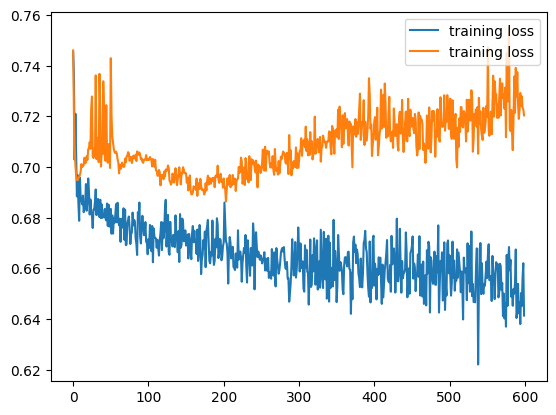

In [28]:
TwoLayerModel_Batchnorm_dropout = nn.Sequential(
    nn.Linear(11, 7),
    nn.ReLU(),
    nn.BatchNorm1d(7),
    nn.Linear(7, 5),
    nn.ReLU(),
    nn.BatchNorm1d(5),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.BatchNorm1d(3),
    nn.Linear(3, 1),
    nn.Dropout(p=0.2),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel_Batchnorm_dropout,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.7543917894363403, validation loss 0.7636102437973022
Epoch 2, training loss 0.7321480512619019, validation loss 0.7448287010192871
Epoch 3, training loss 0.7195984721183777, validation loss 0.7322267293930054
Epoch 4, training loss 0.7117694020271301, validation loss 0.7231579422950745
Epoch 5, training loss 0.7081261277198792, validation loss 0.716439962387085
Epoch 6, training loss 0.7037306427955627, validation loss 0.7114647030830383
Epoch 7, training loss 0.6971884965896606, validation loss 0.7078148722648621
Epoch 8, training loss 0.6969239711761475, validation loss 0.7049364447593689
Epoch 9, training loss 0.6967743635177612, validation loss 0.7026302814483643
Epoch 10, training loss 0.6937631964683533, validation loss 0.7009341716766357
Epoch 11, training loss 0.693082332611084, validation loss 0.6995605230331421
Epoch 12, training loss 0.6936229467391968, validation loss 0.6984688639640808
Epoch 13, training loss 0.6929101347923279, validation loss 0.6

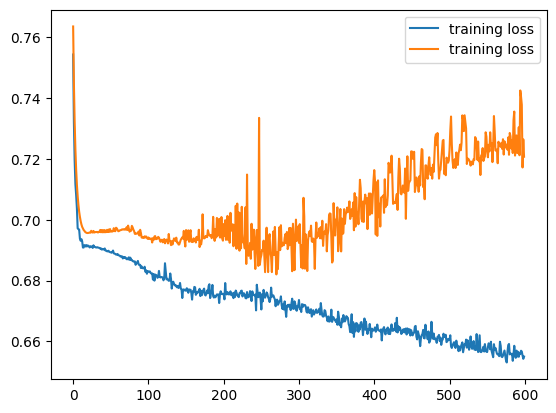

In [29]:
TwoLayerModel_Batchnorm_dropout = nn.Sequential(
    nn.Linear(11, 7),
    nn.ReLU(),
    nn.BatchNorm1d(7),
    nn.Linear(7, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Dropout(p=0.01),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel_Batchnorm_dropout,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)

Epoch 1, training loss 0.6929812431335449, validation loss 0.6975517272949219
Epoch 2, training loss 0.6927384734153748, validation loss 0.6964882612228394
Epoch 3, training loss 0.6926459670066833, validation loss 0.6957452297210693
Epoch 4, training loss 0.692628026008606, validation loss 0.6952133774757385
Epoch 5, training loss 0.6926430463790894, validation loss 0.6948232054710388
Epoch 6, training loss 0.6926693916320801, validation loss 0.6945298910140991
Epoch 7, training loss 0.6926959156990051, validation loss 0.6943038105964661
Epoch 8, training loss 0.6927176117897034, validation loss 0.694125235080719
Epoch 9, training loss 0.6927326321601868, validation loss 0.6939805746078491
Epoch 10, training loss 0.6927409172058105, validation loss 0.693860650062561
Epoch 11, training loss 0.6927430033683777, validation loss 0.6937589049339294
Epoch 12, training loss 0.692739725112915, validation loss 0.6936706304550171
Epoch 13, training loss 0.692732036113739, validation loss 0.6935

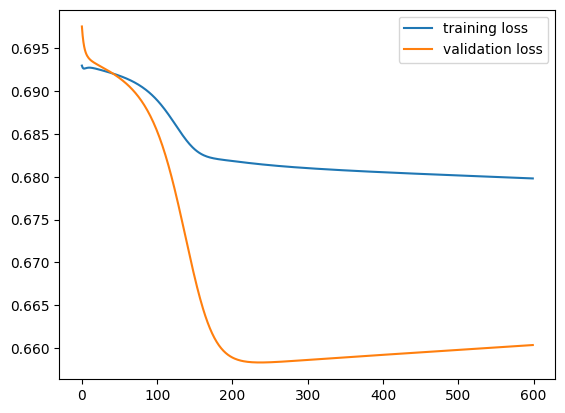

In [33]:
torch.manual_seed(63)
TwoLayerModel_Batchnorm = nn.Sequential(
    nn.Linear(11, 30),
    nn.Tanh(),
    nn.Linear(30, 40),
    nn.Tanh(),
    nn.Linear(40, 50),
    nn.Tanh(),
    nn.Linear(50, 50),
    nn.Tanh(),
    nn.Linear(50, 1),
    nn.Sigmoid(),
)
Model=train_model(TwoLayerModel_Batchnorm,train_features,train_targets,valid_features,valid_targets,epochs=600,b_size=200)